In [107]:
pd.options.mode.chained_assignment = None
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
import math
from adjustText import adjust_text

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (10, 10)

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [108]:
eae_genes = pd.read_csv('data\EAE_gene_list.csv')
ms_genes = pd.read_csv('data\MS_related_genes.csv')
df=pd.read_excel('data\\Unstim_vs_IgE_Differential_Expression.xlsx')

In [135]:
def preprocess(df):
    df = df[['Gene Symbol', 'Entrez ID', 'F_unstim_S4', 'M_unstim_S2', 'F_IgE_S3', 'M_IgE_S1']]
    df = df.dropna()
    df = df.replace(0, np.nan)
    df = df.dropna(axis=0, thresh = 2).fillna(0)
    return df
def logs(i):
    i["log_Mi"] = np.log2(i['M_IgE_S1']+1)
    i["log_Fi"] = np.log2(i['F_IgE_S3']+1)
    i["log_Mu"] = np.log2(i['M_unstim_S2']+1)
    i["log_Fu"] = np.log2(i['F_unstim_S4']+1)
    i["unstim_FC"] = i["log_Mu"] - i["log_Fu"]
    i["IgE_FC"] = i["log_Mi"] - i["log_Fi"]
    return i


In [ ]:
def outputting(df, name=''):
    df = df[['Gene Symbol', 'log_Fu', 'log_Fi', 'log_Mu', 'log_Mi']]
    df.rename(columns={'Gene Symbol':"NAME"}, inplace=True)
    df.to_csv("outputs//"+name+".csv", index=False)
    return
def sexdiff(df, thresh=0.58):
    nthresh = -1 * thresh
    df = df.loc[((df["unstim_FC"] >thresh) & (df["IgE_FC"] >thresh)) |
                ((df["unstim_FC"] <nthresh) & (df["IgE_FC"] <nthresh))]
    df.shape
    return df
def all_sexdiff(df, thresh=0.58):
    df = df.loc[(abs(df["unstim_FC"]) >=thresh) | (abs(df["IgE_FC"]) >= thresh)]
    df.shape
    return df

In [124]:
df = preprocess(df)
df = logs(df)
#df = all_sexdiff(df)

In [138]:
df = sexdiff(df, thresh=3)

In [139]:
outputting(df, "all_genes_2fc")

In [32]:
eae_df = df.loc[df['Entrez ID'].isin(eae_genes['GeneID'])]
ms_df = df.loc[df['Entrez ID'].isin(ms_genes['GeneID'])]

In [33]:
eae_dif = sexdiff(eae_df)
ms_dif = sexdiff(ms_df)

In [34]:
for i in list(eae_df.loc[eae_df[['F_unstim_S4', 'M_unstim_S2', 'F_IgE_S3', 'M_IgE_S1']].idxmax(axis=1) == 'F_unstim_S4']['Gene Symbol']):
    print(i)

Cx3cr1
Gas6
Adgrg3
Esr1
Rtn4r
Flt3l
Mapt
Tgfbr2
Ltb4r1
Nfatc2
Trpm2
Sirpa
Mif
Tnfrsf21
Egfl7
Fyb
Dicer1
Slc12a5
Irak1
C1qtnf6
Klrg1
Pgap3
Kit
Dpysl2
Cpt1a
Mdk
Prkcb
Cd276
Mcu
Slamf1
Nr4a2
Ccl25
Ppard
Smek1
Nlrc3
Cttn
Nlrp3
Rock1
Ahr
Kiss1r
B4galt6
Cmklr1
Mmp9
Apoe
Ccr4
Mir326
Cryab
Gria2
Mir26a-2
Park2
Gal
Dll4
Dysf
Cxcl17
Chrna10
Apom
Nefl


In [44]:
def plot(df):
    plt.figure()
    scatter = plt.scatter(data=df, s=10, x='unstim_FC', y='IgE_FC')
    labels = []
    for i in df.index:
            if (abs(df['unstim_FC'][i]) > 1) | (abs(df['IgE_FC'][i]) > 1):
                labels.append(plt.text(x=df['unstim_FC'][i], y=df['IgE_FC'][i], s=df["Gene Symbol"][i]))

    plt.xlabel("unstim_FC")
    plt.ylabel("IgE_FC")

    plt.axvline(x=0.58, linestyle=":", linewidth=0.5)
    plt.axvline(x=-0.58, linestyle=":", linewidth=0.5)
    plt.axhline(y=0.58, linestyle=":", linewidth=0.5)
    plt.axhline(y=-0.58, linestyle=":", linewidth=0.5)
    plt.axvline(x=0, linewidth=1)
    plt.axhline(y=0, linewidth=1)

    adjust_text(labels, force_points=0.2, force_text=0.2,
                expand_points=(1, 1), expand_text=(1, 1),
                arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
    plt.show()
    return

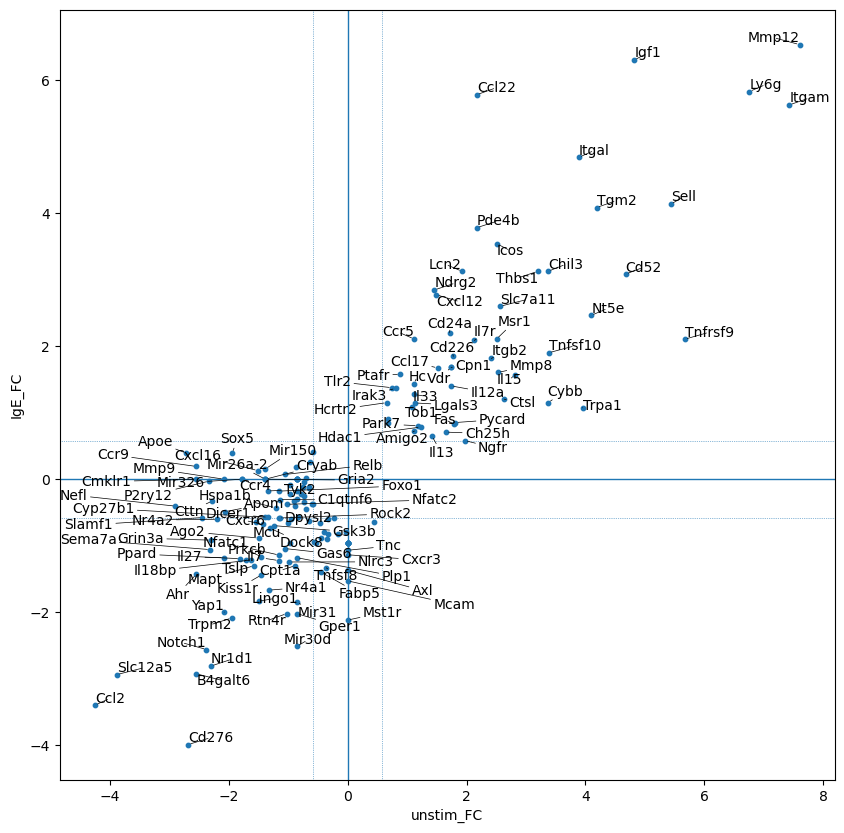

In [45]:
plot(eae_dif)

In [ ]:
plot(ms_df)

# Kmeans

In [96]:
df1 = eae_dif[['Gene Symbol', 'log_Fu', 'log_Fi', 'log_Mu', 'log_Mi']]
df1.set_index('Gene Symbol', inplace=True)
df1

,log_Fu,log_Fi,log_Mu,log_Mi
Gene Symbol,,,,
Ch25h,0.851874,9.526021,2.506067,10.233596
Il33,0.000000,9.440636,1.117810,10.714896
Il13,7.295905,14.547058,8.713978,15.197902
Sema7a,5.087404,9.818518,2.776287,8.760326
Fas,4.286247,9.288212,6.081082,10.116565
...,...,...,...,...
Lcn2,0.851874,0.000000,2.776287,3.125248
Thbs1,0.000000,0.000000,3.200256,3.125248
Vdr,0.000000,0.000000,1.739998,1.681361


In [97]:
df1=df1.apply(sp.stats.zscore)

C:\Users\Tau\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0.5, 0, 'Values of K')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'The Elbow Method using Inertia')

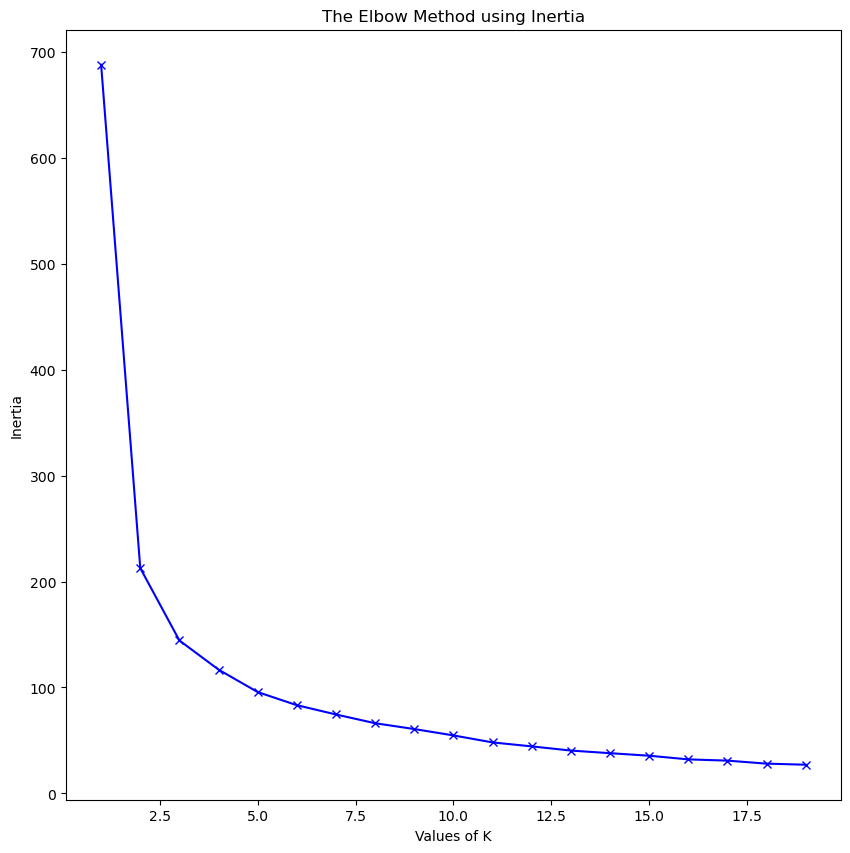

In [98]:
inertias = []
K = range(1, 20)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df1)
    inertias.append(kmeanModel.inertia_)
    
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [99]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df1)

In [100]:
df1['label']=kmeans.labels_

In [104]:
df1 = df1.sort_values(['log_Mi', 'log_Mu', 'log_Fi','log_Fu'])

In [105]:
df1

,log_Fu,log_Fi,log_Mu,log_Mi,label
Gene Symbol,,,,,
Gal,-1.083474,-1.363946,-1.318790,-1.432691,1
Dll4,-1.083474,-1.363946,-1.318790,-1.432691,1
Chrna10,-1.083474,-1.363946,-1.318790,-1.432691,1
Cxcl17,-1.083474,-1.363946,-1.318790,-1.432691,1
Dysf,-1.083474,-1.363946,-1.318790,-1.432691,1
...,...,...,...,...,...
Tgm2,0.407088,0.942905,1.439697,1.910086,2
Kit,2.163010,1.885926,2.080546,1.957894,2
Ccl22,-1.283858,0.641541,-0.791850,2.008940,4


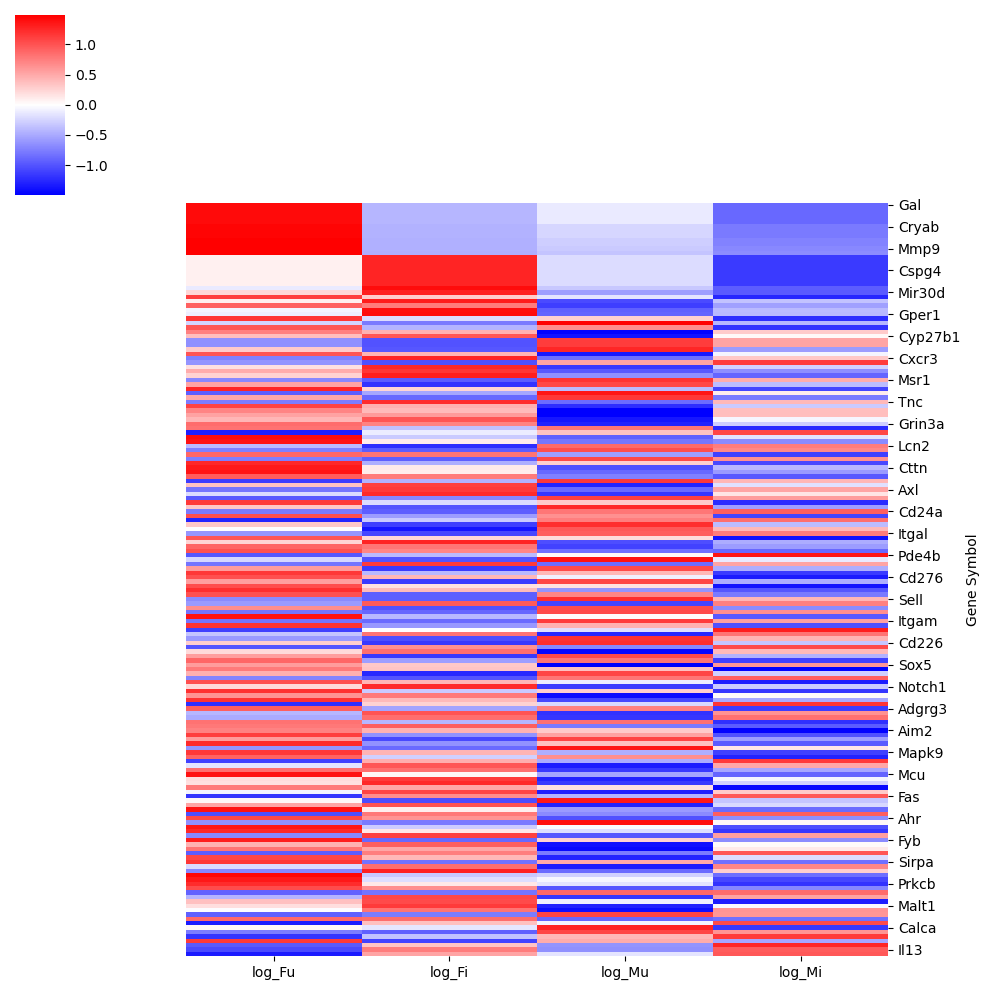

In [106]:
sns.clustermap(data=df1[['log_Fu', 'log_Fi', 'log_Mu', 'log_Mi']], 
               z_score=0,
               row_cluster=False, 
               col_cluster=False, 
               cmap='bwr')
plt.show()

In [ ]:
df1 = df[['log_Mi', 'log_Fi', 'log_Mu', 'log_Fu']]
df1.index=df['Gene Symbol']

In [ ]:
df1["unstim_FC"] = df1["log_Mu"] - df1["log_Fu"]
df1["IgE_FC"] = df1["log_Mi"] - df1["log_Fi"]

df1 = df1.loc[(abs(df1["unstim_FC"] >= 0.58) | abs(df1["IgE_FC"] >= 0.58))]
df1.shape
df1

In [ ]:
outputting(df1, "kmeans_all")

In [ ]:
df1.columns

In [ ]:
df1.reset_index(drop=True, inplace=True)

In [ ]:
sns.clustermap(data = df1[['log_Mi', 'log_Fi', 'log_Mu', 'log_Fu']], 
               z_score=0, 
               row_cluster=False, 
               col_cluster=False, 
               cmap='bwr')

In [84]:
import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(df1[['log_Fu', 'log_Fi', 'log_Mi', 'log_Mu']])
embedding.shape
df_umap=pd.DataFrame(embedding, index=df1.index, columns = ['X', 'Y'])

C:\Users\Tau\AppData\Roaming\Python\Python37\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11103. The TBB threading layer is disabled.
  warnings.warn(problem)


(11207, 2)

In [85]:
sns.scatterplot(data=df_umap, x='X', y='Y')

<AxesSubplot:xlabel='X', ylabel='Y'>

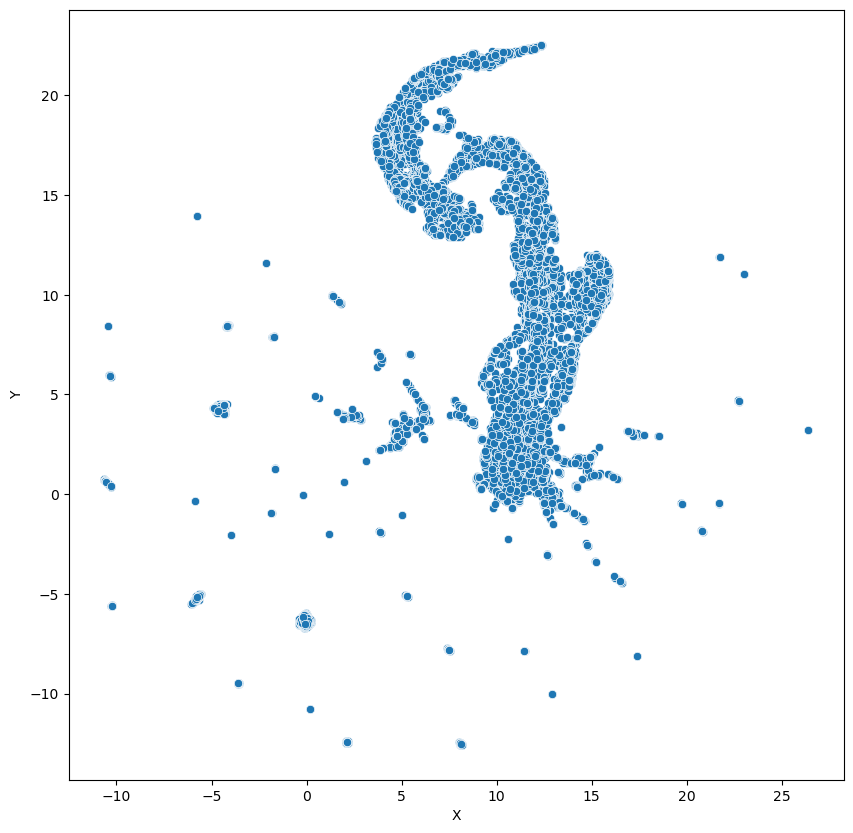

In [86]:
plt.show()

In [ ]:
eae_df1 = eae_df.loc[(eae_df['log_Fi'] > eae_df['log_Fu']) & (eae_df['log_Mi'] > eae_df['log_Mu'])]

In [ ]:
eae_df1

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
df1

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df1)
kmeans.fit(df1)

In [ ]:
df1 = df1.sort_values('label').reset_index()

In [ ]:
outputting(df1, 'kmeans_all')